<a href="https://colab.research.google.com/github/AndreaHernandez5072/CienciaDatos/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Andrea Marleny Hernández Contreras, 1203718

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

# Machine Learning - Dimensionality Reduction
from sklearn.decomposition import PCA

# Machine Learning - Clustering
from sklearn.cluster import KMeans

# Machine Learning - Evaluation Metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import accuracy_score

# Machine Learning - Visualization
from yellowbrick.cluster import KElbowVisualizer

# Clustering Normalizado

In [143]:
dfC=pd.read_csv("mushroom_normalizated_data.csv")

In [144]:
dfC.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [145]:
#sin estandarizar
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfC)
print(dfx_pca.explained_variance_ratio_)
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=3)
seg_PCA1 = pca.fit_transform(dfC)
print(n_components)

[3.99379292e-01 2.74575005e-01 1.56115414e-01 1.43597987e-01
 1.39878741e-02 7.20140687e-03 2.94218812e-03 1.98720883e-03
 2.13623580e-04]
4


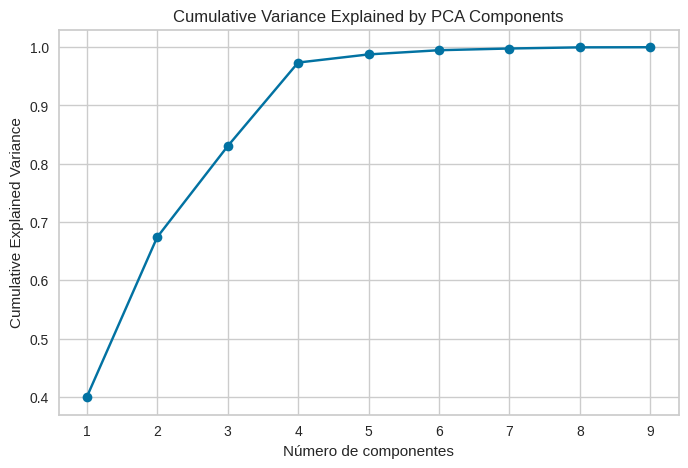

In [146]:
import matplotlib.pyplot as plt

cumulative_variance = dfx_pca.explained_variance_ratio_.cumsum()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Número de componentes')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [147]:
inertia=[]
for k in range (2,9):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(seg_PCA1)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [148]:
inertia

[915979.1511456794,
 662732.3198576688,
 480948.9846880752,
 390747.53212974715,
 328165.3785160455,
 282549.6414319218,
 242902.51337552618]

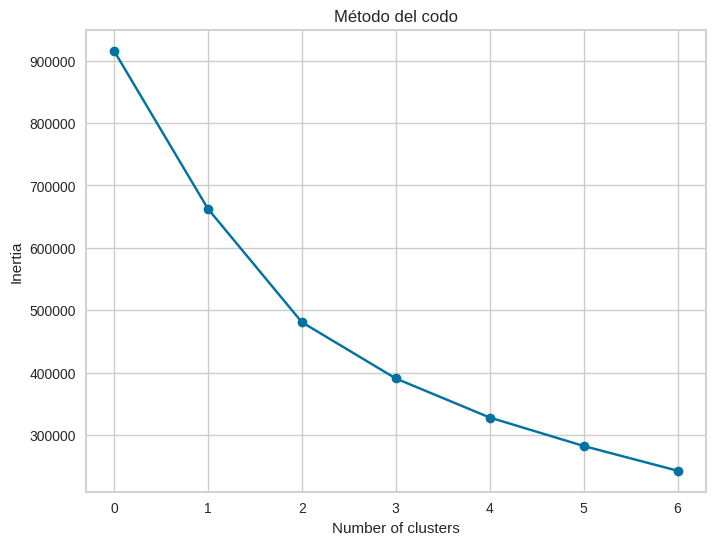

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Método del codo")
plt.show()
n_clusters = 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


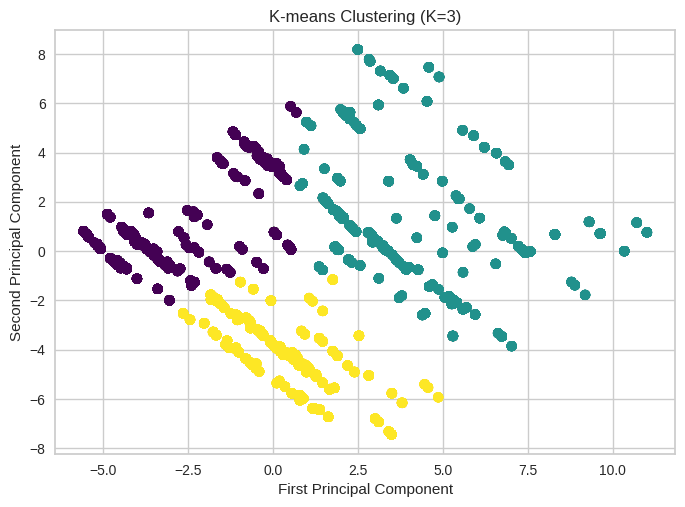

In [150]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(seg_PCA1)
plt.scatter(seg_PCA1[:, 0], seg_PCA1[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

# Cluster sin normalización

In [151]:
dfC=pd.read_csv("mushroom_cleaned.csv")

In [152]:
#estandarizado
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfC)
print(dfx_pca.explained_variance_ratio_)
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=3)
seg_PCA2 = pca.fit_transform(dfC)
print(n_components)

[9.52474360e-01 4.74851051e-02 1.61146250e-05 1.13684302e-05
 6.28699731e-06 5.77349864e-06 5.81518230e-07 2.88611085e-07
 1.21574476e-07]
1


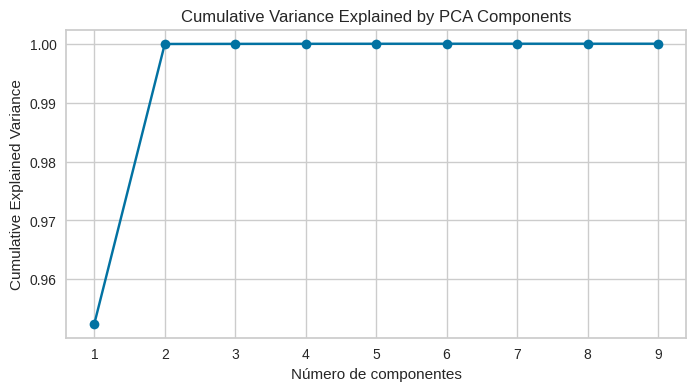

In [153]:
cumulative_variance = dfx_pca.explained_variance_ratio_.cumsum()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Número de componentes')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [154]:
inertia=[]
for k in range (1,9):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(seg_PCA2)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [155]:
inertia

[40046824276.92279,
 14009037798.845417,
 7072219682.755524,
 5018651662.537411,
 3797909130.816972,
 3164055975.8539844,
 2794046387.9773593,
 2477324932.534045]

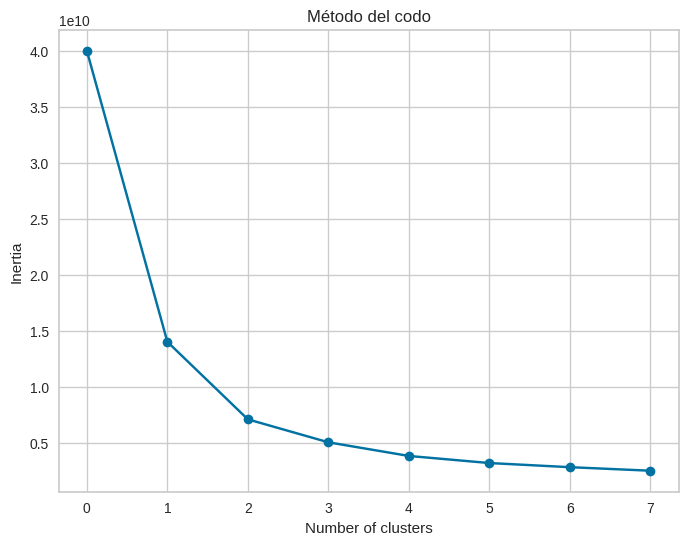

In [156]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Método del codo")
plt.show()
n_clusters = 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


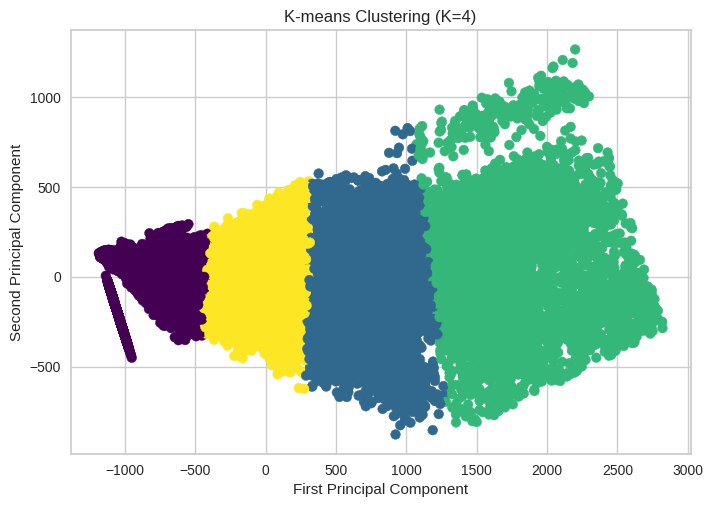

In [157]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(seg_PCA2)
plt.scatter(seg_PCA2[:, 0], seg_PCA2[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()